In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression



In [6]:
df = pd.read_csv("/Users/riccardo.soleo/Desktop/ADM HW2/ADM-HW2-final/steam_reviews.csv")

### ***[RQ1] Before diving deep into the dataset provided, it's crucial to understand its structure and main features. Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.***

In [66]:
#let's see the number of rows(reviews) and the number of columns
print(df.shape)
print(df.head(5))

(21747371, 28)
   Unnamed: 0  app_id                  app_name  review_id  language  \
0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3           3  292030  The Witcher 3: Wild Hunt   85184605   english   
4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review   timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了 2021-01-23 06:00:29   
1                                 拔DIAO无情打桩机--杰洛特!!! 2021-01-23 05:50:30   
2                                              巫师3NB 2021-01-23 05:46:40   
3  One of the best RPG's of all time, worthy of a... 2021-01-23 05:32:50   
4                                                 大作 2021-01-23 05:23:47   

   timestamp_updated  recommended  votes_helpful  ...  author.num_reviews  \
0         16113816

the dataset has 21.747.371 rrows e 23 columns: each row is a review, each column shows specific aspects of the reviewed game and the user who reviewed.

In [5]:
#shows the number of unique games reviewed 
n_games=df['app_id'].nunique()
n_games1=df['app_name'].nunique()
n_users=df['author.steamid'].nunique()
print(n_games1,n_games)
print(n_users)


315 315
12406560


315 games reviewed by 12.406.560 users.



let's the missing values.

In [6]:
df.isnull().sum() 

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

The 'review' field has 33,748 missing values, indicating the number of players who left a review recommending or not recommending a game without adding a comment. We also find 25,682 people who reviewed a game without having played it.

***Plot the number of reviews for each application in descending order. What insights can you draw from the plot?***

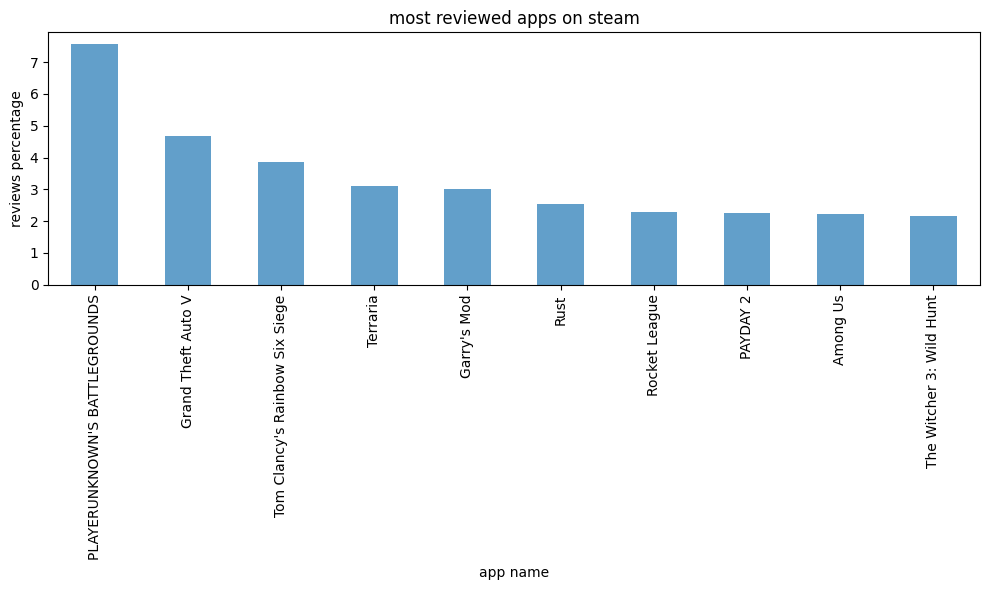

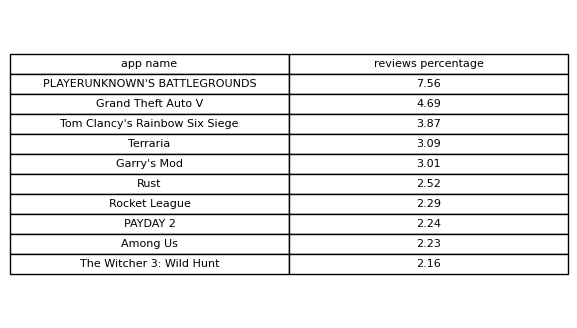

In [8]:
#count the number of reviews for every game.
cont_recensioni = df['app_name'].value_counts()


review_perc=cont_recensioni/cont_recensioni.sum()*100
#take the first 10.
primi10 = review_perc.head(10)  

# plot the graph.
plt.figure(figsize=(10, 6))  
primi10.plot(kind='bar', alpha=0.7)
plt.xlabel('app name')
plt.ylabel('reviews percentage')
plt.title('most reviewed apps on steam')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))  
ax.axis('tight')  
ax.axis('off')    

#shows the table
table_data = primi10.reset_index()
table_data.columns = ['app name', 'reviews percentage']
table_data['reviews percentage'] = (table_data['reviews percentage']).round(2)  


tabella = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')


tabella.scale(1.2, 1.2)


plt.show()


As we can see from the frequency histogram, the most reviewed game is 'Battleground' with 7.56% of reviews in favor, followed by 'GTA 5' with 4.69%, and 'Rainbow Six Siege' with 3.89%


28
language
english       44.306215
schinese      17.312286
russian       10.800846
brazilian      3.851151
spanish        3.739854
german         3.460630
turkish        2.923884
koreana        2.821638
french         2.491110
polish         2.278570
tchinese       1.003353
czech          0.616074
italian        0.612980
thai           0.586292
japanese       0.375926
portuguese     0.374234
swedish        0.368900
dutch          0.356618
hungarian      0.326481
latam          0.322352
danish         0.257112
finnish        0.251580
norwegian      0.169202
romanian       0.150501
ukrainian      0.097341
greek          0.066546
bulgarian      0.048070
vietnamese     0.030257
Name: proportion, dtype: float64


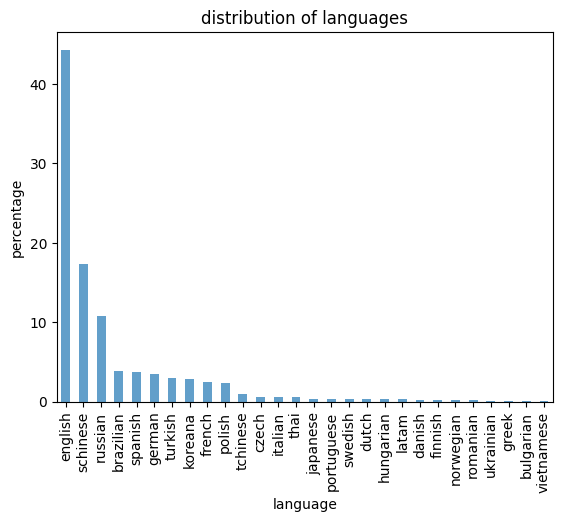

In [9]:
n_lingue=df['language'].nunique()
print(n_lingue)
frequenza_lingue = df['language'].value_counts(normalize=True)*100
print(frequenza_lingue)
(df['language'].value_counts(normalize=True)*100).plot(kind='bar', alpha=0.7)
plt.xlabel('language')
plt.ylabel('percentage')
plt.title('distribution of languages')
plt.show()

The reviews are written in 28 different languages. Specifically, around 40% are in English, 17% in Chinese (Mandarin), and 10% in Russian. The other languages appear with lower frequencies.

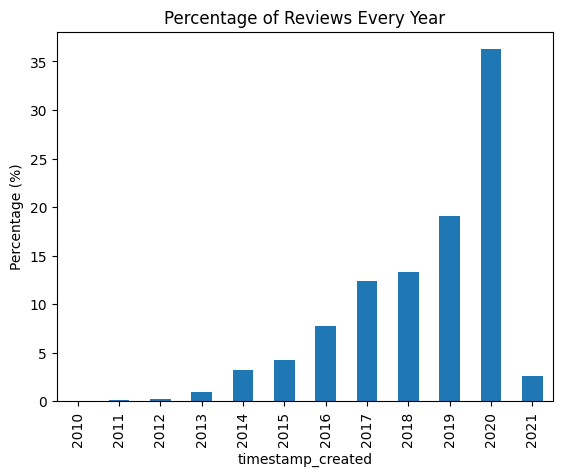

In [10]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
#count the reviews per year
year_counts = df['timestamp_created'].dt.year.value_counts().sort_index()

# Calcola le percentuali
year_percentages = (year_counts / year_counts.sum()) * 100

# Crea il grafico a barre con le percentuali
year_percentages.plot(kind='bar', title='Percentage of Reviews Every Year', ylabel='Percentage (%)')

# Mostra il grafico
plt.show()

The year with the highest number of reviews is 2020, likely due to the COVID-19 pandemic, which forced people to stay at home, giving them more time to play games (and therefore write reviews). We observe an increasing trend in the number of reviews up until 2020, followed by a significant decline in 2021, as the dataset observations only go up to February 2021.

### ***[RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.***


***Identify which applications have the highest and lowest number of reviews.***

In [38]:
print(f"game with the most reviews: {df['app_name'].value_counts().idxmax()} ({df['app_name'].value_counts().max()} reviews)")
print(f"game with the lowest reviews: {df['app_name'].value_counts().idxmin()} ({df['app_name'].value_counts().min()} reviews)")

game with the most reviews: PLAYERUNKNOWN'S BATTLEGROUNDS (1644255 reviews)
game with the lowest reviews: Neon Hardcorps (200 reviews)


***Plot the number of reviews for each application in descending order. What insights can you draw from the plot?***

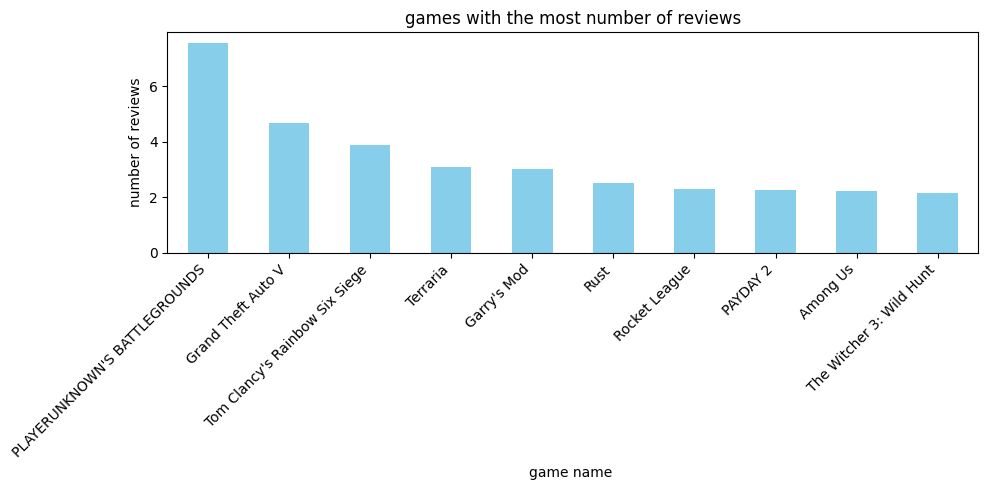

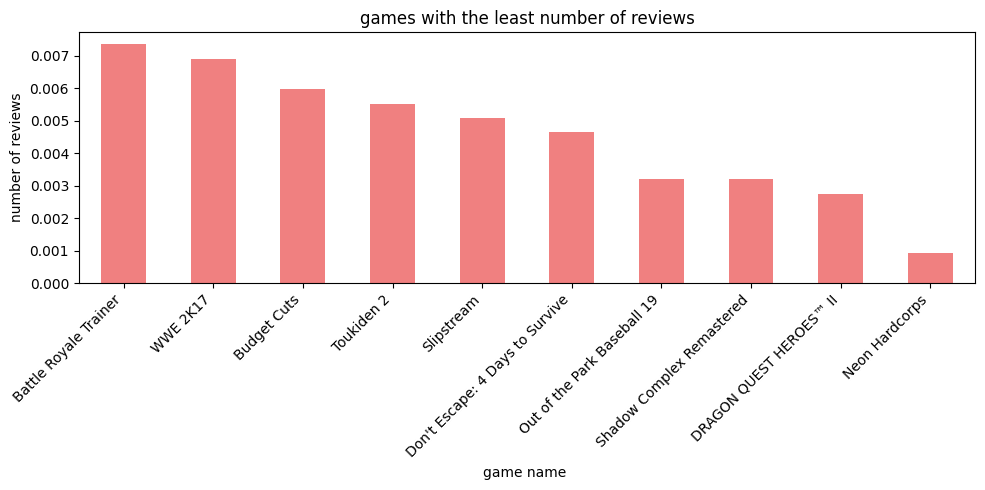

In [39]:
#find the most ancd the least reviewed games in percentage
recensioni_per_gioco_perc=(df['app_name'].value_counts()/df['app_name'].value_counts().sum())*100
top_giochi=recensioni_per_gioco_perc.head(10)
bottom_giochi=recensioni_per_gioco_perc.tail(10)

#plot the barplots
plt.figure(figsize=(10, 5))
top_giochi.plot(kind='bar', color='skyblue')
plt.title('games with the most number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

plt.figure(figsize=(10, 5))
bottom_giochi.plot(kind='bar', color='lightcoral')
plt.title('games with the least number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

we can see that the most reviewed game is "PLAYERUNKNOWN'S BATTLEGROUND", the least reviewed is "Neon Hardcorps".
From the graph, the kind of games most played are the shooter and action.
The least played graph is more heterogeneous.

***For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.***


In [12]:
#unique values in 'steam_purchase'
steam_purchase_values = df['steam_purchase'].unique()
print("unique values in 'steam_purchase':", steam_purchase_values)

#unique values in 'received_for_free'
received_for_free_values=df['received_for_free'].unique()
print("unique values in 'received_for_free':", received_for_free_values)

#frequencies 'steam_purchase'
steam_purchase_counts = df['steam_purchase'].value_counts()
print("frequencies in 'steam_purchase':")
print(steam_purchase_counts)

#frequencies'received_for_free'
received_for_free_counts = df['received_for_free'].value_counts()
print("frequencies in 'received_for_free':")
print(received_for_free_counts)


unique values in 'steam_purchase': [ True False]
unique values in 'received_for_free': [False  True]
frequencies in 'steam_purchase':
steam_purchase
True     16842432
False     4904939
Name: count, dtype: int64
frequencies in 'received_for_free':
received_for_free
False    21059310
True       688061
Name: count, dtype: int64


In [13]:
# top 5
top_games=df['app_name'].value_counts().head(5).index

#empty list to store the results
results=[]

#for each top app, calculate the percentage breakdown of reviews by purchase type
for app in top_games:
    app_reviews=df[df['app_name'] == app]
    
    #count purchased vs. received for free
    purchased_reviews=app_reviews[app_reviews['steam_purchase'] == True].shape[0]
    free_reviews=app_reviews[app_reviews['received_for_free'] == True].shape[0]
    total_reviews=app_reviews.shape[0]
    
    #percentages
    purchased_percentage=(purchased_reviews / total_reviews) * 100 
    free_percentage=(free_reviews / total_reviews) * 100 
    
    #reviews with unknown purchase type
    unknown_reviews_percentage=(total_reviews - (purchased_reviews + free_reviews))/total_reviews *100
    
    #append the result as a dictionary
    results.append({
        'app_name':app,
        'purchased_reviews':purchased_reviews,
        'free_reviews':free_reviews,
        'total_reviews':total_reviews,
        'purchased_percentage':purchased_percentage,
        'free_percentage':free_percentage,
        'unknown_percentage':unknown_reviews_percentage
    })

# print results
results_df=pd.DataFrame(results)
print(results_df)
#calculate and print total percentages 
results_df['total_percentage']=results_df['purchased_percentage'] + results_df['free_percentage']
print("Total percentage check:\n", results_df[['app_name', 'total_percentage']])



                         app_name  purchased_reviews  free_reviews  \
0   PLAYERUNKNOWN'S BATTLEGROUNDS            1372721         61443   
1              Grand Theft Auto V             905288         38624   
2  Tom Clancy's Rainbow Six Siege             702505         36300   
3                        Terraria             527762         20154   
4                     Garry's Mod             551250         24765   

   total_reviews  purchased_percentage  free_percentage  unknown_percentage  
0        1644255             83.485895         3.736829           12.777276  
1        1019116             88.830712         3.789951            7.379337  
2         841918             83.441024         4.311584           12.247392  
3         672815             78.440879         2.995474           18.563647  
4         655524             84.093031         3.777894           12.129075  
Total percentage check:
                          app_name  total_percentage
0   PLAYERUNKNOWN'S BATTLEGROUNDS 

we can't see substantial differences from the percentage tab, only gta5 tend to be purchased more than the others.
the sum of the percentages doesn't arrives at 100, because some player didn't buy the game on steam or get it for free.

**Which applications have the most and the least user recommendations? Summarize your findings.**

in absolute terms we can see what game have the most and least reccomendations.

In [52]:


#group by app_id and app_name,then count the recommendations
recommendation_counts=df.groupby(['app_id', 'app_name', 'recommended']).size().unstack(fill_value=0)

recommendation_counts.columns=['Negative', 'Positive']
#identify them
most_recommended=recommendation_counts['Positive'].idxmax() 
least_recommended=recommendation_counts['Positive'].idxmin()
#counts them
most_recommended_counts=recommendation_counts.loc[most_recommended]
least_recommended_counts=recommendation_counts.loc[least_recommended]

print("Most recommended games:")
print(f"App ID: {most_recommended[0]}, game name: {most_recommended[1]}")
print(f"positive reviews: {most_recommended_counts['Positive']}, negative reviews: {most_recommended_counts['Negative']}")

print("\nLeast recommended Games:")
print(f"App ID: {least_recommended[0]}, game name: {least_recommended[1]}")
print(f"positive reviews: {least_recommended_counts['Positive']}, negative reviews: {least_recommended_counts['Negative']}")


Most recommended games:
App ID: 578080, game name: PLAYERUNKNOWN'S BATTLEGROUNDS
positive reviews: 886417, negative reviews: 757838

Least recommended Games:
App ID: 454200, game name: Neon Hardcorps
positive reviews: 89, negative reviews: 111


we can see also what game is the most and least loved by doing an analysis in relative terms, taking the games with the highest and lowest reccomendend ratio.

In [53]:
#calculate the ratio
recommendation_counts['Total_Reviews'] = recommendation_counts['Positive'] + recommendation_counts['Negative']
recommendation_counts['Positive_Ratio'] = recommendation_counts['Positive'] / recommendation_counts['Total_Reviews']

#find the most and least loved games
highest_ratio_game = recommendation_counts['Positive_Ratio'].idxmax()
lowest_ratio_game = recommendation_counts['Positive_Ratio'].idxmin()

#takes the counts
highest_ratio_counts = recommendation_counts.loc[highest_ratio_game]
lowest_ratio_counts = recommendation_counts.loc[lowest_ratio_game]

#display the results
print("Game with the highest positive recommendation ratio:")
print(f"App ID: {highest_ratio_game[0]}, Game Name: {highest_ratio_game[1]}")
print(f"Positive Ratio: {highest_ratio_counts['Positive_Ratio']:.2f}, Total Reviews: {highest_ratio_counts['Total_Reviews']}")
print(f"Positive Reviews: {highest_ratio_counts['Positive']}, Negative Reviews: {highest_ratio_counts['Negative']}")

print("\nGame with the lowest positive recommendation ratio:")
print(f"App ID: {lowest_ratio_game[0]}, Game Name: {lowest_ratio_game[1]}")
print(f"Positive Ratio: {lowest_ratio_counts['Positive_Ratio']:.2f}, Total Reviews: {lowest_ratio_counts['Total_Reviews']}")
print(f"Positive Reviews: {lowest_ratio_counts['Positive']}, Negative Reviews: {lowest_ratio_counts['Negative']}")

Game with the highest positive recommendation ratio:
App ID: 1229490, Game Name: ULTRAKILL
Positive Ratio: 1.00, Total Reviews: 5584.0
Positive Reviews: 5558.0, Negative Reviews: 26.0

Game with the lowest positive recommendation ratio:
App ID: 792990, Game Name: Identity
Positive Ratio: 0.24, Total Reviews: 1804.0
Positive Reviews: 439.0, Negative Reviews: 1365.0


the most loved game is ULTRAKILL, almost anyone who played it reccomend it (5558 o 5584!).
the least loved game is Identity, with a low positive review ratio(24%), 1 of 4 liked the game.

***Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.***

COMPLETE REGRESSION+ CORRELATION TEST


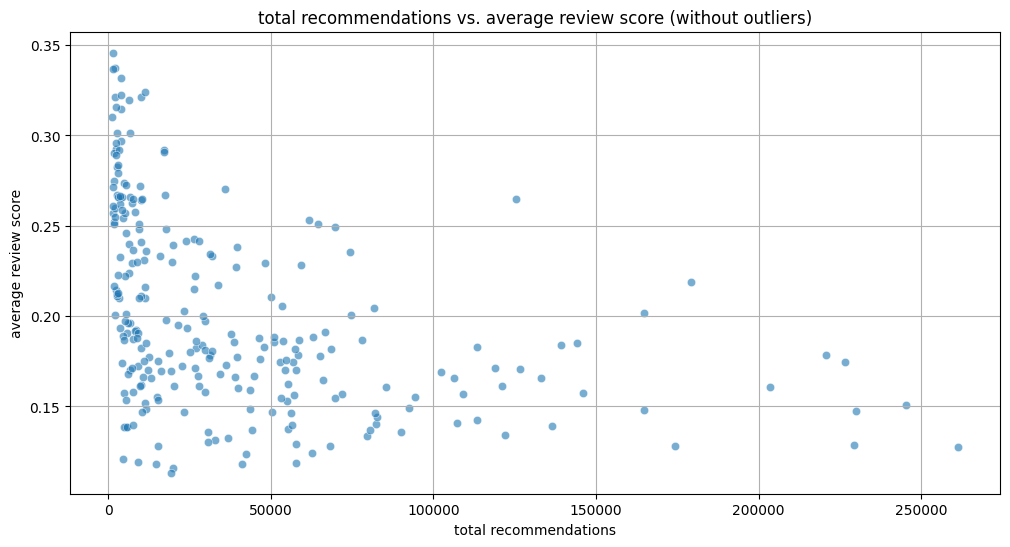

Pearson's correlation coefficient: -0.4125
P-value: 4.6048e-12
Coefficiente di Correlazione di Spearman: -0.5698
P-value: 1.0639e-23
Intercept: 0.2187
Gradient: -0.0000
R^2: 0.1702


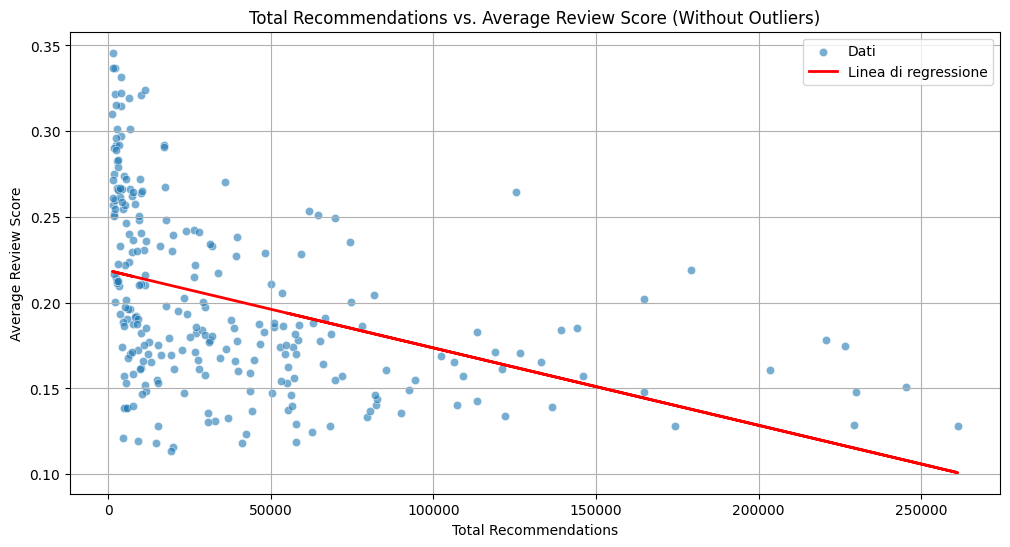

In [27]:

#group by app id and app name 
app_grouped = df.groupby(['app_id', 'app_name']).agg({
    'recommended': 'sum',
    'weighted_vote_score': 'mean',
    'review_id': 'count'
}).rename(columns={
    'recommended': 'total_recommendations',
    'weighted_vote_score': 'average_review_score',
    'review_id': 'total_reviews'
}).reset_index()

#remove the outliers
lower_bound_recc = app_grouped['total_recommendations'].quantile(0.05)
upper_bound_recc = app_grouped['total_recommendations'].quantile(0.95)
lower_bound_score1 = app_grouped['average_review_score'].quantile(0.05)
upper_bound_score1 = app_grouped['average_review_score'].quantile(0.95)

filtered_data = app_grouped[
    (app_grouped['total_recommendations'] >= lower_bound_recc) &
    (app_grouped['total_recommendations'] <= upper_bound_recc) &
    (app_grouped['average_review_score'] >= lower_bound_score1) &
    (app_grouped['average_review_score'] <= upper_bound_score1)
]

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['total_recommendations'], filtered_data['average_review_score'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('total recommendations vs. average review score')
plt.xlabel('total recommendations')
plt.ylabel('average review score')
plt.grid(True)
plt.show()

#pearson's correlation
x = filtered_data['total_recommendations']
y = filtered_data['average_review_score']
pearson_corr, pearson_pval = pearsonr(x, y)
print(f"pearson's correlation coefficient: {pearson_corr:.4f}")
print(f"p-value: {pearson_pval:.4e}")

#spearman's correlation
spearman_corr, spearman_pval = spearmanr(x, y)
print(f"spearman's correlation coefficient: {spearman_corr:.4f}")
print(f"p-value: {spearman_pval:.4e}")

# Linear regression
X = x.values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)

# Regressor coefficients
intercept = regressor.intercept_
slope = regressor.coef_[0]
r_squared = regressor.score(X, y)

print(f"intercept: {intercept:.4f}")
print(f"gradient: {slope:.4f}")
print(f"R^2: {r_squared:.4f}")

# Plot 
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5, label='Dati')
plt.plot(x, regressor.predict(X), color='red', linewidth=2, label='regression line')
plt.title('total recommendations vs average review score')
plt.xlabel('rotal recommendations')
plt.ylabel('average review score')
plt.legend()
plt.grid(True)
plt.show()




we can see if the logaritmic transformation lead us to the same results

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/1477114846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_total_recommendations'] = np.log1p(filtered_data['total_recommendations'])


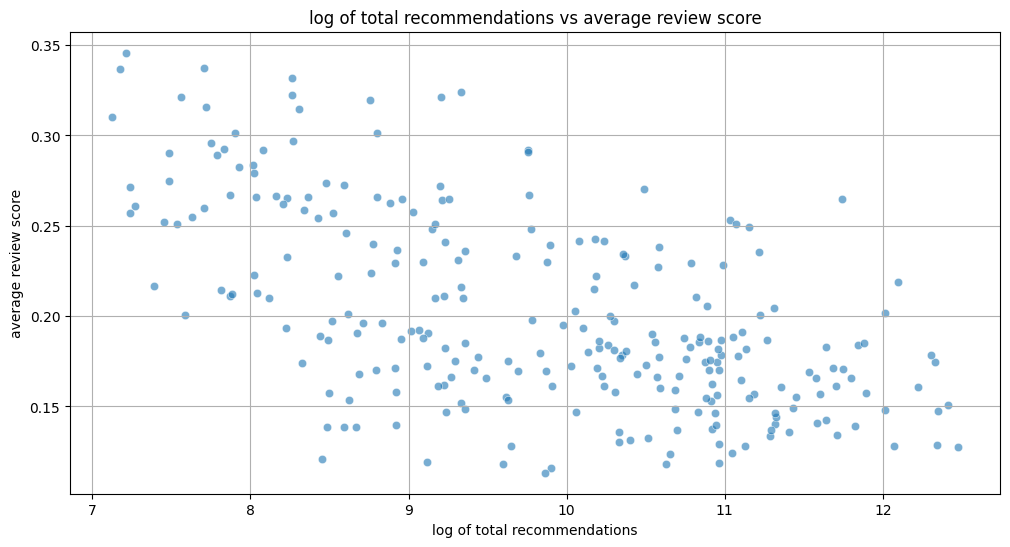

intercept: 0.4360
slope: -0.0239
R^2 : 0.3525


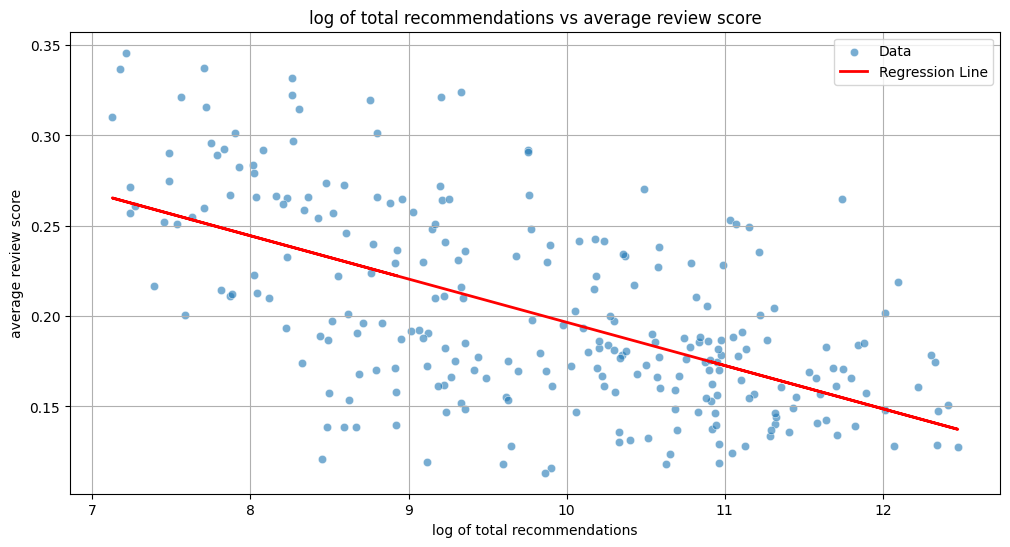

In [30]:
# Log transformation of total recommendations
filtered_data['log_total_recommendations'] = np.log1p(filtered_data['total_recommendations'])

# Scatter plot with log-transformed data
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['log_total_recommendations'], filtered_data['average_review_score'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('log of total recommendations vs average review score')
plt.xlabel('log of total recommendations')
plt.ylabel('average review score')
plt.grid(True)
plt.show()

# Linear regression with log-transformed data
log_x = filtered_data['log_total_recommendations'].values.reshape(-1, 1)
regressor_log = LinearRegression()
regressor_log.fit(log_x, y)

# Log-transformed regressor coefficients
intercept_log = regressor_log.intercept_
slope_log = regressor_log.coef_[0]
r_squared_log = regressor_log.score(log_x, y)

print(f"intercept: {intercept_log:.4f}")
print(f"slope: {slope_log:.4f}")
print(f"R^2 : {r_squared_log:.4f}")

# Plot regression line with log-transformed data
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['log_total_recommendations'], y, alpha=0.6, edgecolors='w', linewidth=0.5, label='Data')
plt.plot(filtered_data['log_total_recommendations'], regressor_log.predict(log_x), color='red', linewidth=2, label='Regression Line')
plt.title('log of total recommendations vs average review score')
plt.xlabel('log of total recommendations')
plt.ylabel('average review score')
plt.legend()
plt.grid(True)
plt.show()

the results are pretty the same.

### ***[RQ3]Understanding when users are most active in submitting reviews can help identify peak engagement periods.***

***Plot the number of reviews submitted each month and describe any trends.***

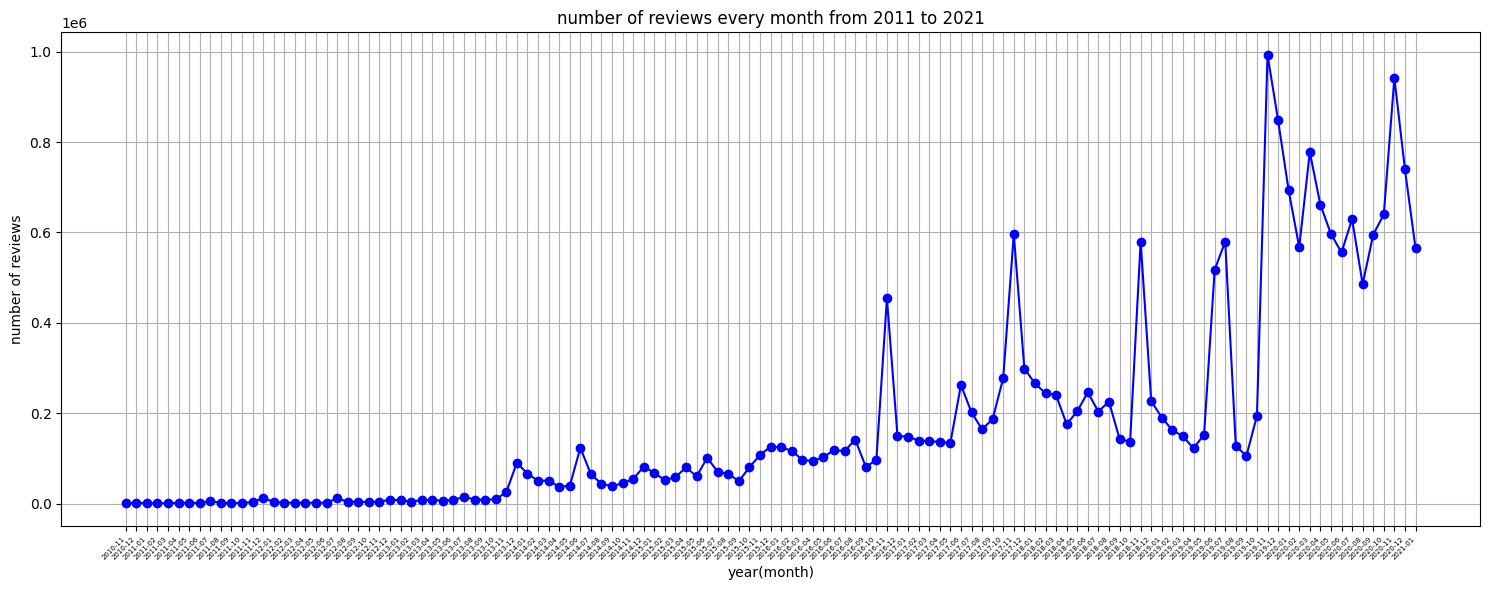

In [44]:
#use the datetime and select the month
df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
df['year_month']=df['timestamp_created'].dt.to_period('M')

#grouping by month
monthly_reviews=df.groupby('year_month').size()

#make the graph
plt.figure(figsize=(15, 6))

plt.plot(monthly_reviews.index.astype(str), monthly_reviews, marker='o', color='b')
plt.title('number of reviews every month from 2011 to 2021')
plt.xlabel('year(month)')
plt.ylabel('number of reviews')
plt.grid(True)
plt.xticks(rotation=45, ha='right',fontsize=5)  
plt.tight_layout()
plt.show()


maybe the peaks are seasonal effects like christmas or summer vacations , but to confirm this we have to see if this trends appears in the english (for example) reviewers beacause maybe the chinese vacations are in a different period compared to the english.

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/2884812645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['timestamp_created'] = pd.to_datetime(df_english['timestamp_created'], unit='s')
/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/2884812645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['year_month'] = df_english['timestamp_created'].dt.to_period('M')


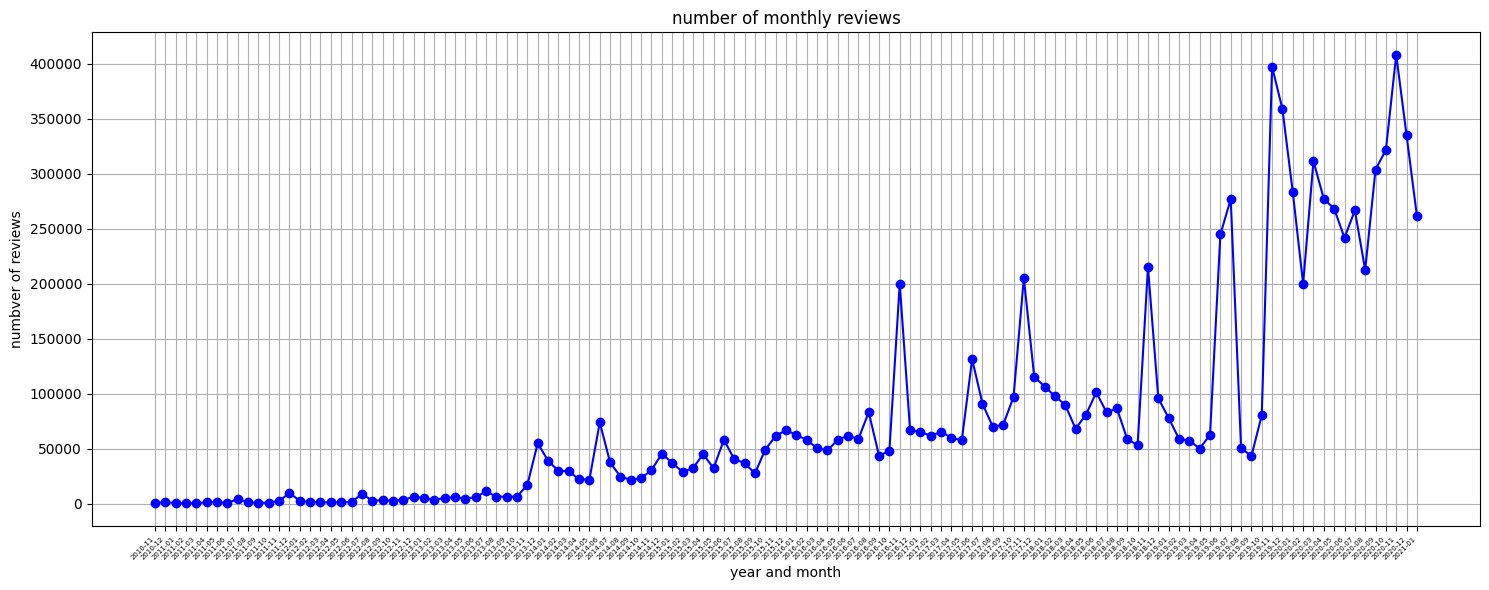

In [40]:
#select only the english reviews
df_english=df[df['language'] == 'english']

# convert to datetime
df_english['timestamp_created'] = pd.to_datetime(df_english['timestamp_created'], unit='s')
df_english['year_month'] = df_english['timestamp_created'].dt.to_period('M')
#group by month
monthly_reviews_english = df_english.groupby('year_month').size()
#graph
plt.figure(figsize=(15,6))  
plt.plot(monthly_reviews_english.index.astype(str), monthly_reviews_english, marker='o', color='b')
plt.title('number of monthly reviews')
plt.xlabel('year and month')
plt.ylabel('numbver of reviews')
plt.grid(True)
plt.xticks(rotation=45,ha='right',fontsize=5)
plt.tight_layout()
plt.show()


***Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.***

***Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.***


this confirm that the steam community is more active in the early summer(june) or christmas vacation(november/december.)
we can also see that after the covid-19 the general number of reviews(and so the gamers), has raised noticebly.

***What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.***

***Create a function that accepts a list of time intervals and plots the number of reviews for each interval.***

In [43]:
def count_time_intervals(df, time_intervals):
    #convert time and select only the hour 
    if df['timestamp_created'].dtype!='datetime64[ns]':
        df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
    df['hour']=df['timestamp_created'].dt.hour
    #labels and bins for the time interval
    labels=[f'{start:02d}:00 - {end-1:02d}:59' for start, end in time_intervals]
    bins=[start for start, end in time_intervals] + [time_intervals[-1][1]]
    #create a new column 
    df['time_group']=pd.cut(df['hour'],bins=bins,labels=labels,right=False,include_lowest=True)
    # group by time 
    reviews_per_time_group = df.groupby('time_group').size()
    
    return reviews_per_time_group



/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/1211579093.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_time_group = df.groupby('time_group').size()


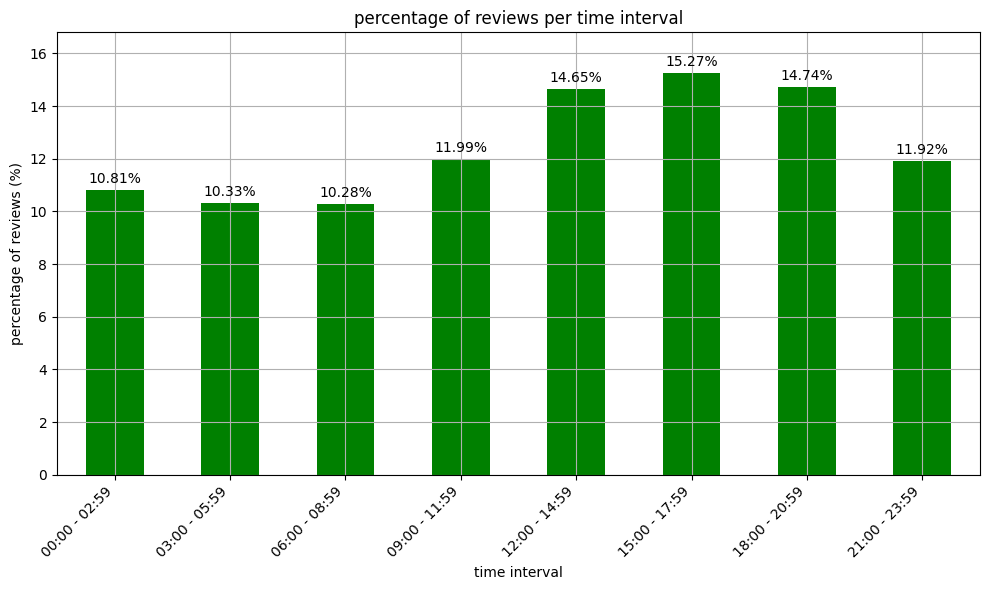

,time interval,reviews,percentage
time_group,,,
00:00 - 02:59,00:00 - 02:59,2351647,10.81%
03:00 - 05:59,03:00 - 05:59,2245879,10.33%
06:00 - 08:59,06:00 - 08:59,2235243,10.28%
09:00 - 11:59,09:00 - 11:59,2608544,11.99%
12:00 - 14:59,12:00 - 14:59,3186547,14.65%
15:00 - 17:59,15:00 - 17:59,3321010,15.27%
18:00 - 20:59,18:00 - 20:59,3205641,14.74%
21:00 - 23:59,21:00 - 23:59,2592860,11.92%


In [46]:
from IPython.display import display
#define the time intervals
time_intervals = [
    (0,3),   #00:00 - 02:59
    (3,6),  #03:00 - 05:59
    (6,9),  #06:00 - 08:59
    (9,12), #09:00 - 11:59
    (12,15), #12:00 - 13:59
    (15,18),#14:00 - 16:59
    (18,21), #17:00 - 19:59
    (21,24)  #20:00 - 23:59
]
time_interval_labels = [
    '00:00 - 02:59',
    '03:00 - 05:59',
    '06:00 - 08:59',
    '09:00 - 11:59',
    '12:00 - 14:59',
    '15:00 - 17:59',
    '18:00 - 20:59',
    '21:00 - 23:59'
]
#count the reviews for interval
reviews_per_interval=count_time_intervals(df, time_intervals)
reviews_per_interval_percentage=[i/sum(reviews_per_interval)*100 for i in reviews_per_interval]
data_time = {
    'time interval': time_interval_labels,
    'reviews': reviews_per_interval,
    'percentage': reviews_per_interval_percentage
}
#dataset
df_table = pd.DataFrame(data_time)

#graph
plt.figure(figsize=(10, 6))
ax = df_table['percentage'].plot(kind='bar', color='g')
ax.set_title('percentage of reviews per time interval')
ax.set_xlabel('time interval')
ax.set_ylabel('percentage of reviews (%)')
ax.set_xticks(range(len(time_interval_labels)))
ax.set_xticklabels(time_interval_labels, rotation=45, ha='right')
ax.set_ylim(0, df_table['percentage'].max() * 1.1)  # Add some space above the highest bar

#add percentage labels on top of each bar
for i, pct in enumerate(df_table['percentage']):
    ax.text(i, pct + df_table['percentage'].max() * 0.01, f'{pct:.2f}%', ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()
#display the dataset
df_table['percentage'] = df_table['percentage'].map('{:.2f}%'.format)
display(df_table)


as we can see, the time interval with more reviews is in the afternoon(from 12 to 21).
We can conclude that in the night there are less reviews due to the fact that the people sleep in that time. 

### ***[RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.***


***Analyze the relationship between the amount of time a user has spent on an application and their review score.***


/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/2871644537.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  playtime_recommendation = df.groupby('playtime_category')['recommended'].mean()*100


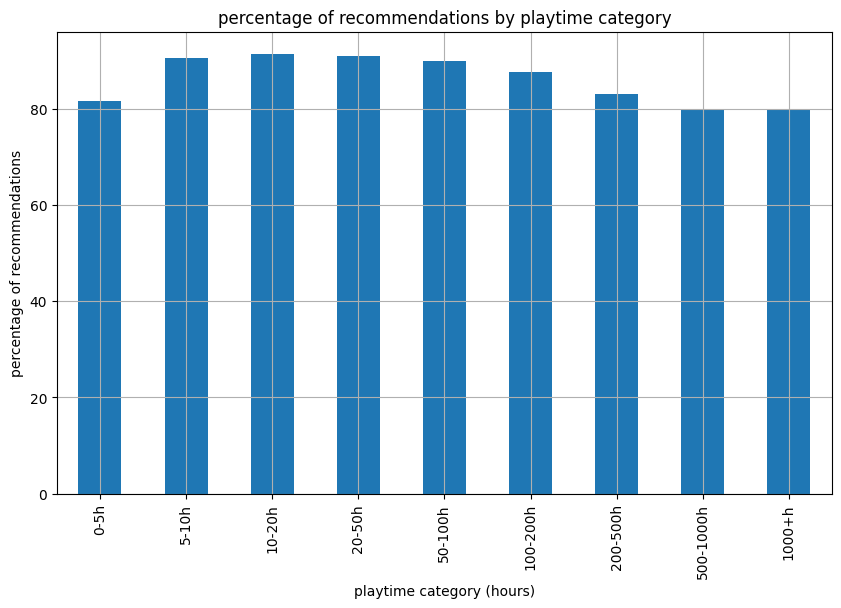

-0.03778280359277639


In [50]:
# Convert the playtime in hour 
df['playtime_hours'] = df['author.playtime_at_review'] / 60  

#create the categories of playtime
bins = [0, 5, 10, 20, 50, 100, 200, 500, 1000,10000]  
labels = ['0-5h', '5-10h', '10-20h', '20-50h', '50-100h', '100-200h', '200-500h', '500-1000h','1000+h']
df['playtime_category'] = pd.cut(df['playtime_hours'], bins=bins, labels=labels, right=False)

#takes the percentage(we can use the mean because the values are binary)
playtime_recommendation = df.groupby('playtime_category')['recommended'].mean()*100

#display the results
playtime_recommendation.plot(kind='bar', figsize=(10,6))
plt.title('percentage of recommendations by playtime category')
plt.xlabel('playtime category (hours)')
plt.ylabel('percentage of recommendations')
plt.grid(True)
plt.show()

correlation = df['author.playtime_forever'].corr(df['recommended'])
print(correlation)



***Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.***

COMMENT

### ***[RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.***

***Determine the ten reviewers with the highest number of reviews in the dataset.***

In [32]:
top_10_reviewers=df.groupby('author.steamid').size().sort_values(ascending=False).head(10)
print(top_10_reviewers)


author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
dtype: int64


***What is the percentage of each language used by these top 10 reviewers when submitting a review?***

In [54]:
top_10_reviewer_ids = top_10_reviewers.index
filtered_reviews1 = df[df['author.steamid'].isin(top_10_reviewer_ids)]
#count the occurrences of each language in the filtered dataset
language_counts = filtered_reviews1['language'].value_counts()
language_percentage = round((language_counts / language_counts.sum()) * 100,2)
#display the result
print(language_percentage)

language
english     53.94
russian     28.14
schinese    17.92
Name: count, dtype: float64


COMMENT


***Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.***

In [56]:
average_helpful_votes = filtered_reviews1.groupby('author.steamid')['votes_helpful'].mean()
average_helpful_votes = average_helpful_votes.reindex(top_10_reviewers.index)
print(round(average_helpful_votes,2))

author.steamid
76561198062813911     0.89
76561198315585536    49.71
76561198192166873    38.90
76561198239163744     7.64
76561198045381877     2.25
76561198064946151     3.99
76561198013146396     0.97
76561198027973295    11.80
76561197969749884    26.24
76561197989746995    21.06
Name: votes_helpful, dtype: float64


The average helpful votes of the top-ten reviewers are between a minimum of 0.89 to a maximum of 49.71. That would suggest that whereas some reviewers (like the second one with the most reviews in the dataset, ID:76561198315585536)tend to produce content of high value to the community, others may be seen as less relevant and receive few helpful votes( like the first one with an average of 0.89 helpful votes for each reviews, ID:76561198062813911), this might indicate a spam by them.
In all, this gap suggests that more reviews do not imply a better or more helpful quality, and it indicates big differences in how the community values contributions from top reviewers.

***Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.***


/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_1273/3389827738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


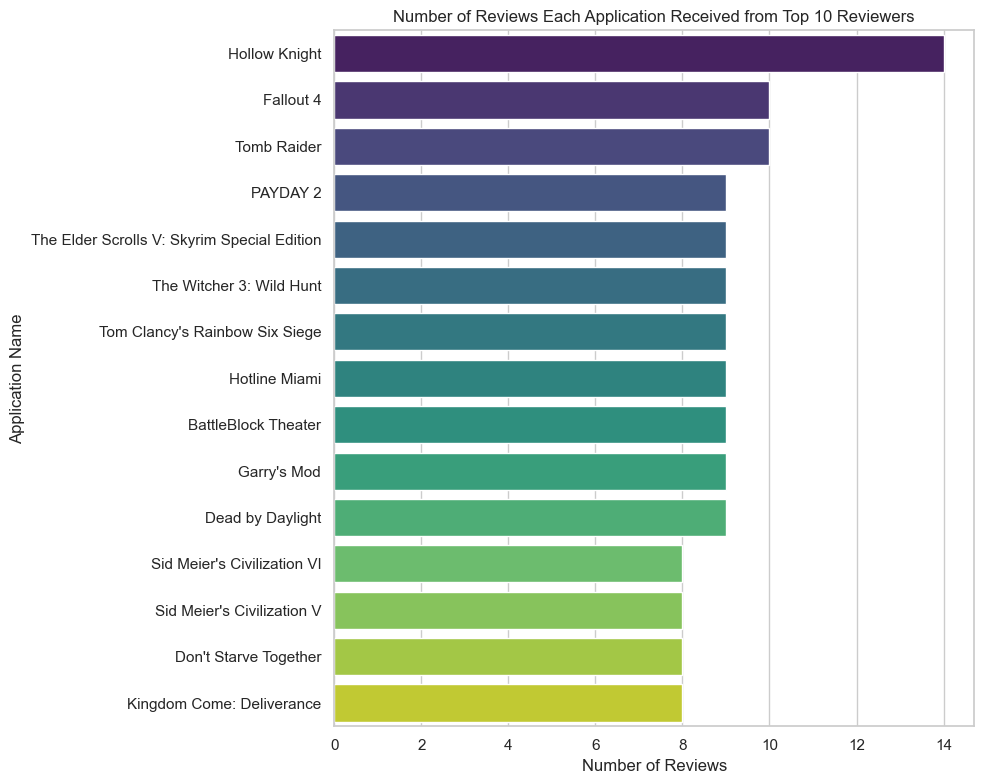

application: Hollow Knight
number of reviews: 14
percentage of total reviews: 1.31%

application: Fallout 4
number of reviews: 10
percentage of total reviews: 0.94%

application: Tomb Raider
number of reviews: 10
percentage of total reviews: 0.94%

application: PAYDAY 2
number of reviews: 9
percentage of total reviews: 0.84%

application: The Elder Scrolls V: Skyrim Special Edition
number of reviews: 9
percentage of total reviews: 0.84%

application: The Witcher 3: Wild Hunt
number of reviews: 9
percentage of total reviews: 0.84%

application: Tom Clancy's Rainbow Six Siege
number of reviews: 9
percentage of total reviews: 0.84%

application: Hotline Miami
number of reviews: 9
percentage of total reviews: 0.84%

application: BattleBlock Theater
number of reviews: 9
percentage of total reviews: 0.84%

application: Garry's Mod
number of reviews: 9
percentage of total reviews: 0.84%

application: Dead by Daylight
number of reviews: 9
percentage of total reviews: 0.84%

application: Sid Me

In [59]:
import seaborn as sns
app_review_counts = filtered_reviews1.groupby('app_name').size().sort_values(ascending=False)
#for readability we will take only the fisrt 15 games
top_10_app_review_counts = app_review_counts.head(15)

#create the graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(
    y=top_10_app_review_counts.index, 
    x=top_10_app_review_counts.values, 
    palette="viridis"
)
plt.title('number of reviews each application received from top 10 reviewers')
plt.xlabel('number of reviews')
plt.ylabel('application name')

plt.tight_layout()
plt.show()

#display the result in a table
for app_name, count in top_10_app_review_counts.items():
    percentage = (count / app_review_counts.sum()) * 100
    print(f"application: {app_name}\nnumber of reviews: {count}\npercentage of total reviews: {percentage:.2f}%\n")

### ***[RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers***



***Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?.***

In [61]:
#find english and spanish review
eng_reviews = df[df['language'] == 'english'].copy()
spn_reviews = df[df['language'] == 'spanish'].copy()

#convert the timestamp to datetime
eng_reviews['timestamp_created'] = pd.to_datetime(eng_reviews['timestamp_created'],unit='s')
eng_reviews['timestamp_updated'] = pd.to_datetime(eng_reviews['timestamp_updated'],unit='s')
spn_reviews['timestamp_created'] = pd.to_datetime(spn_reviews['timestamp_created'],unit='s')
spn_reviews['timestamp_updated'] = pd.to_datetime(spn_reviews['timestamp_updated'],unit='s')

#find the updates reviews
eng_updates = eng_reviews[(eng_reviews['timestamp_updated'] != eng_reviews['timestamp_created'])]
spn_updates = spn_reviews[(spn_reviews['timestamp_updated'] != spn_reviews['timestamp_created'])]

#calculate the percentages
eng_update_percentage = round((len(eng_updates) / len(eng_reviews)) * 100, 2) 
spn_update_percentage = round((len(spn_updates) / len(spn_reviews)) * 100, 2)

data_language = {
    'Language': ['English', 'Spanish'],
    'percentage of updated reviews': [eng_update_percentage, spn_update_percentage]
}
update_df = pd.DataFrame(data_language)
print(update_df)



  Language  percentage of updated reviews
0  English                          11.89
1  Spanish                           9.94


***Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?***


In [106]:
#group by steam id
eng_reviewers=eng_reviews.groupby('author.steamid')
spn_reviewers=spn_reviews.groupby('author.steamid')

#calculate the average games owned by each player in each group
eng_mean_games_owned = eng_reviewers['author.num_games_owned'].mean()
spn_mean_games_owned = spn_reviewers['author.num_games_owned'].mean()

#print the overall average number of games owned
print("Average games owned by English reviewers:", eng_mean_games_owned.mean())
print("Average games owned by Spanish reviewers:", spn_mean_games_owned.mean())


Average games owned by English reviewers: 1386365.5475286252
Average games owned by Spanish reviewers: 83.91038983177981


there is a problem with the english mean, maybe there is a wrong value(too high given what came out by applying the mean functionls )

In [115]:
print(df[df['language']=='english']['author.num_games_owned'].max())

4398046511619


well 4398046511619 games it too much for a single player,lets remove it from the analysis, furthermore, many players may be considered multiple times if they have written multiple reviews.
let's fix the code.

In [82]:
#max reasonable number of games 
max_games = 5000

#filter the dataset taking only the english and spanish reviewers
eng_filtered = eng_reviews[eng_reviews['author.num_games_owned'] <= max_games].copy()
spn_filtered = spn_reviews[spn_reviews['author.num_games_owned'] <= max_games].copy()

#group by steam ID and takes only the max number of games for each user
eng_max_games_owned = eng_filtered.groupby('author.steamid')['author.num_games_owned'].max()
spn_max_games_owned = spn_filtered.groupby('author.steamid')['author.num_games_owned'].max()

#calculate the mean
eng_avg_games_owned = eng_max_games_owned.mean()
spn_avg_games_owned = spn_max_games_owned.mean()

#calculate the number of reviews for each use
eng_reviews_per_user = eng_filtered.groupby('author.steamid').size()
spn_reviews_per_user = spn_filtered.groupby('author.steamid').size()

#calcukate the mean
eng_avg_reviews_per_user = eng_reviews_per_user.mean()
spn_avg_reviews_per_user = spn_reviews_per_user.mean()

#display the results
print(f'average games owned by english reviewers: {round(eng_avg_games_owned, 2)}')
print(f'average games owned by spanish reviewers: {round(spn_avg_games_owned, 2)}')
print(f'average number of games reviewed by english reviewers: {round(eng_avg_reviews_per_user, 2)}')
print(f'average number of games reviewed by spanish reviewers: {round(spn_avg_reviews_per_user, 2)}')


average games owned by english reviewers: 117.98
average games owned by spanish reviewers: 82.9
average number of games reviewed by english reviewers: 1.82
average number of games reviewed by spanish reviewers: 1.65


On average, the english reviewers tend to have 35 more games than the spanish, but both spanish and english reviewers tend to reviews about 2 games on average.
This indicates that, despite having libraries of different sizes, both groups tend to review a limited number of games compared to the total they own.

### ***[RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.***

***What is the probability of submitting a review and receiving at least one helpful vote from other users?***

Having a large dataset, we can use the frequentist definition of probability, where the probability is defined as the cardinality (\#) of favorable cases divided by the cardinality (\#) of total cases.

Let $A$ and $B$ be the sets defined as:


$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$



$B: \left\{ \text{"reviews in the dataset"} \right\}, \text{ with } A \subseteq B$


Then:


$P(A) = \frac{\#\left( A \right)}{\#\left( B \right)}$


where $P(A)$ is the probability of submitting a review and receiving at least one helpful vote from other users.






In [65]:
helpful_reviews=df[df['votes_helpful']>0]
card_A=len(helpful_reviews)
card_B=len(df)
prob_A=round((card_A / card_B),3)
print(f'cardinality of A: {card_A},'f'cardinality of B: {card_B},'f'probability of submitting a review and receive at least one helpful vote: {prob_A}')

cardinality of A: 6105244,cardinality of B: 21747371,probability of submitting a review and receive at least one helpful vote: 0.281


***What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?***

We can use the definition of conditional probability, defined as:

$P(A|B)=\frac{P(A\cap B)}{P(B)}$

Let, A and C be the sets:

$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$

$C: \left\{ \text{"reviews in the dataset that don't recommend the app"} \right\}$

Then, the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app is given by:

$P(A|C)=\frac{P(A\cap C)}{P(C)}$



In [67]:
A_cap_C=df[(df['recommended'] == False) & (df['votes_helpful'] > 0)]
prob_A_cap_C=len(A_cap_C)/len(df)
C = df[df['recommended'] == False]
prob_C=len(C)/len(df)
print(f" the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app :{round(prob_A_cap_C/prob_C,3)}")

 the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app :0.485


***Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.***

2 events A and D are independent if $P(A \cap D)= P(A) \times P(D)$.

Let:

$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$


$D: \left\{ \text{"reviews by an user that has submitted at least five reviews"} \right\}$




In [141]:
#group by steam ID
user_reviews= df.groupby('author.steamid').size()
#takes only the users with 5 or more reviews and calculates the probability
D= user_reviews[user_reviews >= 5].index
prob_D=len(D)/len(df)
#calculate A gropued by steam ID
A_grouped= df[df['votes_helpful'] > 0].groupby('author.steamid').size()
prob_A
#verify that the cardinality of A is correct
print(A_grouped.sum()==card_A)
#takes the intersection and calcultaes the probability
A_cap_D= A_grouped[A_grouped>= 5].index
prob_A_cap_D=len(A_cap_D)/len(df)
print(prob_A_cap_D,prob_A*prob_D)

True
0.0056928260432031075 0.008437621770465958


The probability are slightly different, so they are not completely independent but since the difference is very low, we can consider them independent.
This makes sense because a user who finds a review useful doesn't look at how many reviews the reviewer has written.
we will also apply a transformation to the data (log), in order to see if the outliers are compromising our analysis.

***We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.***

previously, we observed that there are extreme values in the dataset, so we should conduct the analysis only on reasonable values.
We are going to examine whether users who own more games tend to review a smaller percentage of their games than those who own fewer games. In other words, we should look at the proportion of games reviewed versus games owned for each user.

In [71]:
#display the max
print("Max value in 'author.num_games_owned':", df['author.num_games_owned'].max())
print("Max value in 'author.num_reviews':", df['author.num_reviews'].max())

#summary
print(df[['author.num_games_owned', 'author.num_reviews']].describe())



Max value in 'author.num_games_owned': 4398046511619
Max value in 'author.num_reviews': 4398046511108
       author.num_games_owned  author.num_reviews
count            2.174737e+07        2.174737e+07
mean             1.011300e+06        4.044775e+05
std              2.108829e+09        1.333741e+09
min              0.000000e+00        1.000000e+00
25%              2.200000e+01        2.000000e+00
50%              6.100000e+01        4.000000e+00
75%              1.450000e+02        1.000000e+01
max              4.398047e+12        4.398047e+12


Pearson correlation coefficient: -0.2456230459761378
Pearson p-value: 0.0
Spearman correlation coefficient: -0.7750410942114424
Spearman p-value: 0.0


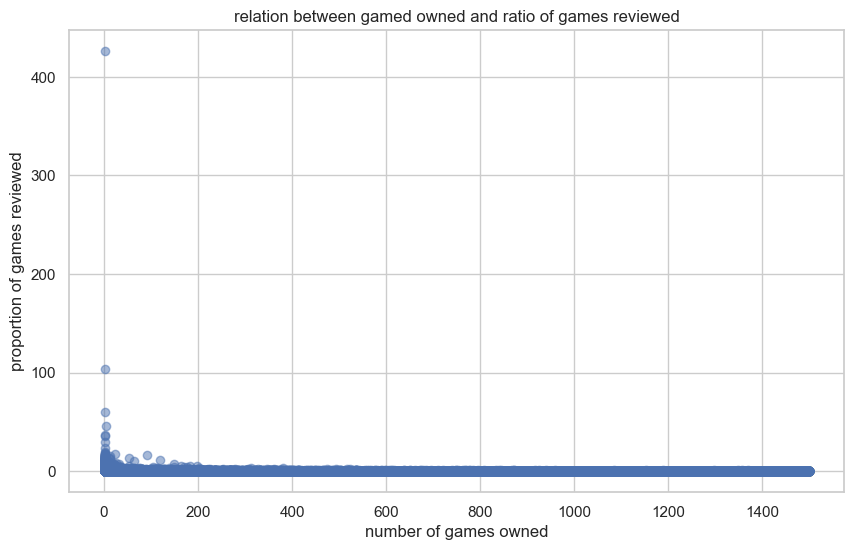

Pearson's correlation coefficient (log): -0.6997465806231907
Pearson's p-value (log): 0.0
Spearman's correlation coefficient (log): -0.7750410942114424
Spearman's p-value (log): 0.0


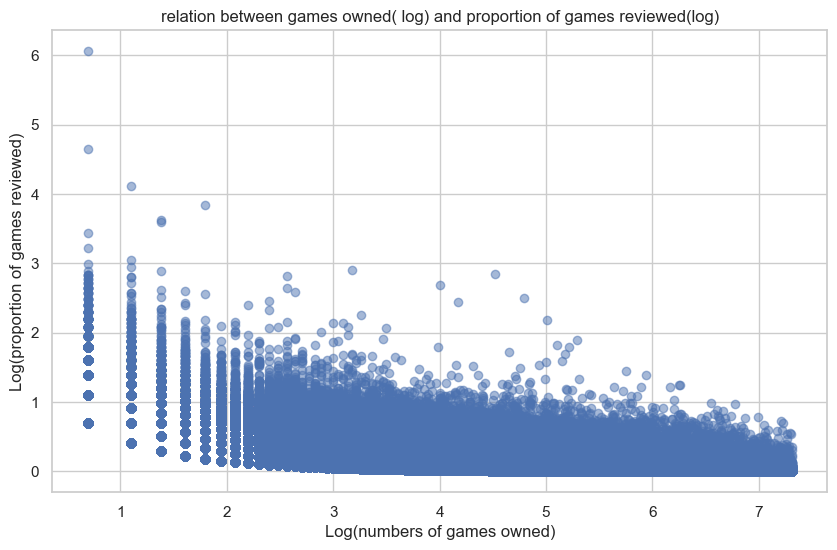

In [74]:
df_copy = df.copy()

#removes missing values
df_clean = df_copy[['author.steamid', 'author.num_games_owned', 'author.num_reviews']].dropna()

#takes only the reasonables values
max_games_threshold = 1500
max_reviews_threshold = 1500

df_clean = df_clean[
    (df_clean['author.num_games_owned'] <= max_games_threshold) &
    (df_clean['author.num_reviews'] <= max_reviews_threshold)
]

# group ny steam ID and takes only the max values for each user 
author_data = df_clean.groupby('author.steamid').agg({
    'author.num_games_owned': 'max',
    'author.num_reviews': 'max'
}).reset_index()

#calculates the proportion of games reviewed on games owned
author_data['proportion_reviewed'] = author_data['author.num_reviews'] / author_data['author.num_games_owned']
#remove missing values
author_data = author_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['proportion_reviewed'])

#calculates the correlations
pearson_corr, pearson_p = pearsonr(author_data['author.num_games_owned'], author_data['proportion_reviewed'])
spearman_corr, spearman_p = spearmanr(author_data['author.num_games_owned'], author_data['proportion_reviewed'])

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p}")
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p}")

# plot
plt.figure(figsize=(10, 6))
plt.scatter(author_data['author.num_games_owned'], author_data['proportion_reviewed'], alpha=0.5)
plt.xlabel('number of games owned')
plt.ylabel('proportion of games reviewed')
plt.title('relation between gamed owned and ratio of games reviewed')
plt.show()



#log transformation
author_data['log_num_games_owned'] = np.log1p(author_data['author.num_games_owned'])
author_data['log_proportion_reviewed'] = np.log1p(author_data['proportion_reviewed'])

#correlation 
pearson_corr_log, pearson_p_log = pearsonr(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'])
spearman_corr_log, spearman_p_log = spearmanr(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'])

#display the results
print(f"Pearson's correlation coefficient (log): {pearson_corr_log}")
print(f"Pearson's p-value (log): {pearson_p_log}")
print(f"Spearman's correlation coefficient (log): {spearman_corr_log}")
print(f"Spearman's p-value (log): {spearman_p_log}")

#display the plot
plt.figure(figsize=(10, 6))
plt.scatter(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'], alpha=0.5)
plt.xlabel('Log(numbers of games owned)')
plt.ylabel('Log(proportion of games reviewed)')
plt.title('relation between games owned( log) and proportion of games reviewed(log)')
plt.show()


the results of the statistical analysis indicate a significant negative correlation between the number of games owned by reviewers and the proportion of games they review. In particular, the pearson correlation coefficient (who  measures the linear relationship between two variables) is equal to -0.2456 with a p-value of 0, while the spearman correlation coefficient (who measures the monotonic relationship between two variables) is -0.7750 with a p-value of 0. These values ​​suggest that as the number of games owned increases, the percentage of games reviewed tends to decrease.
The difference between the two correlation coefficients is notable: the Spearman coefficient indicates a stronger negative monotonic relationship than the linear one measured by the Pearson coefficient. This may be because the relationship between the variables is not strictly linear, but there is still a clear trend that reviewers with larger game libraries review proportionately fewer.

After applying logarithmic transformation to the data, the results show an even stronger negative correlation. The Pearson correlation coefficient become -0.6997, maintaining a p-value of 0, while the Spearman coefficient remains unchanged at -0.7750. The logarithmic transformation reduced the effect of outliers and highlighted a stronger relationship between the variables. This strengthens the evidence that there is a significant negative relationship between the number of games owned and the proportion of games reviewed.

This analysis supports the hypothesis that reviewers who own more games tend to leave reviews on a smaller percentage of their games than those who own fewer. The reason could be that users with large game libraries spend less time on each title individually or are less motivated to share their thoughts for each game. On the other hand, those who own fewer games may be more engaged with each title and therefore more likely to write reviews.

In [131]:
df.head(2)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,year_month,hour,time_group,playtime_hours,playtime_category
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,1611381629,1,0,...,2,1909.0,1448.0,1909.0,1.611343e+09,2021-01,6,06:00 - 10:59,31.816667,20-50h
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,1611381030,1,0,...,10,2764.0,2743.0,2674.0,1.611386e+09,2021-01,5,03:00 - 05:59,44.566667,20-50h


In [58]:
df.columns


Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'year_month', 'hour',
       'time_group', 'playtime_hours'],
      dtype='object')

correlation 

In [25]:
correlation = df['playtime_hours'].corr(df['weighted_vote_score'])
print(f'Correlazione tra tempo di gioco (ore) e punteggio: {correlation}')


Correlazione tra tempo di gioco (ore) e punteggio: 0.046508317325171016


### ***RQ5***

### **Algorithmic Question (Federico's version)**

#### **1. Python script**

In [ ]:
t=0
while not(1<=t<=100):
   t = int(input()) # enter a valid t value as a number of test cases, otherwise re-enter
   
results = []
for _ in range(t):
    n,k = map(int, input().split()) # test case
    if 1<=n<=10**9 and 1<=k<=100: # n and k constraints
        if n<k: 
            results.append("NO")
        elif n%k==0: # if n is a multiple of k
            results.append("YES")
            results.append(" ".join(map(str, [n//k]*k)))
        elif n%2==0:
            if k%2==1:
                if k>=n/2:
                    results.append("NO")
                else:
                    results.append("YES")
                    results.append(" ".join(map(str, [2]*(k-1)+[n-2*(k-1)])))
            elif k%2==0:
                    results.append("YES")
                    results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))
        elif n%2==1:
            if k%2==1:
                results.append("YES")
                results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))
            elif k%2==0:
                results.append("NO")
    else:
        results.append("NO")


for result in results:
    print(result)

YES
2 2 6
YES
25 25 25 25
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
1 1 3


#### **2. Code's time complexity analysis**

for avoiding ambiguity, **n** will stand as the variable used in the code and to indicate *linear complexity*, instead of writing O(n) we'll write **O(m)**


##### **The first loop**
````python
while not(1<=t<=100)
````
has a complexity of O(m), because:
- in the best case, we enter immediately a value of t between 1 and 100 (both included)
- in the worst case, we enter a right value of t, after entering m times a wrong value


##### **The second loop (for)**
````python
for _ in range(t)
````
has a complexity of O(m) because:
- we'll iterate for t times but t is a constant (between 1 and 100), and the costants asymptotically hold O(1)
- every condition (if/elif/else) have a complexity of O(1)
- ````python
  results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))
  results.append(" ".join(map(str, [2]*(k-1)+[n-2*(k-1)])))
  ````
    - theese two lines have both O(m) of complexity because:
      - the map() funcion has a complexity of O(k)
      - the join() function has a complexity of O(m), where m is equal to k + all the spaces added between each two values 
      - the functions are not nested (despite the python syntax)


##### **The third loop (for)**
````python
for result in results
````
it iterates m times where m is the number of the element in the **results** list, so the complexity is O(m)


**Thus in conclusion the algorithm complexity is O(m), so linear**


#### **3. LLM (Copilot) evaluation**

The response from Copilot was similar to mine. For him, too, the algorithm is linear but for different reasons: in my opinion it is because of the map function while in his opinion it is because of the "for _ in range(t)".
In fact I wrote complexity O(m) while he wrote O(t).
Personally I consider his assessment wrong since t is considerable as a constant.
He also does not take the slightest account of the (not insignificant) complexity that many of python's functions hide.